In [1]:
import matplotlib.pyplot as plt
import numpy as np
import hit
import device
from plotting import correlate, plot_events
import yaml
import logger
from cmcrameri import cm

colormap = cm.navia # color map
darkblue = cm.naviaS.resampled(5)(0) # very dark blue
lightgreen = cm.naviaS.resampled(5)(1) # light green
muddygreen = cm.naviaS.resampled(5)(2) # muddy green
lightblue = cm.naviaS.resampled(5)(3) # light blue
whiteish = cm.naviaS.resampled(6)(4) # whiteish
blue = cm.naviaS.resampled(6)(1) # blue
yellowish = cm.naviaS.resampled(8)(3)

In [2]:
with open('setup.yml', "r") as file:
    setup = yaml.full_load(file)

with open('material.yml', "r") as file:
    material = yaml.full_load(file)

In [3]:
folder = setup['data_output']
log = logger.setup_main_logger('pytestbeam')

device_material = [setup['deviceses'][dev]['material'] for dev in setup['deviceses']]
materials = [material[device_material[i]] for i in range(len(device_material))]
names = [dev for dev in setup['deviceses']]

devicess = [setup['deviceses'][dev] for dev in setup['deviceses']]
beam = setup['beam']
hit_tables = hit.tracks(beam, devicess, materials, log)
# device.calculate_device_hit(beam, devicess, hit_tables, names, folder)

2024-04-08 19:03:45,370 [pytestbeam        ] - INFO    Creating telescope setup


2024-04-08 19:03:48,013 [pytestbeam        ] - INFO    Generating particle tracks


  0%|          | 0/1000 [00:00<?, ?it/s]

In [11]:
hit_tables[0][0::len(devicess)][:5]

ListType[float64]([3599.9619638902964, 3599.9619638902964, 3599.9687469577284, 3599.9569542946983, 3599.9654358902453, ...])

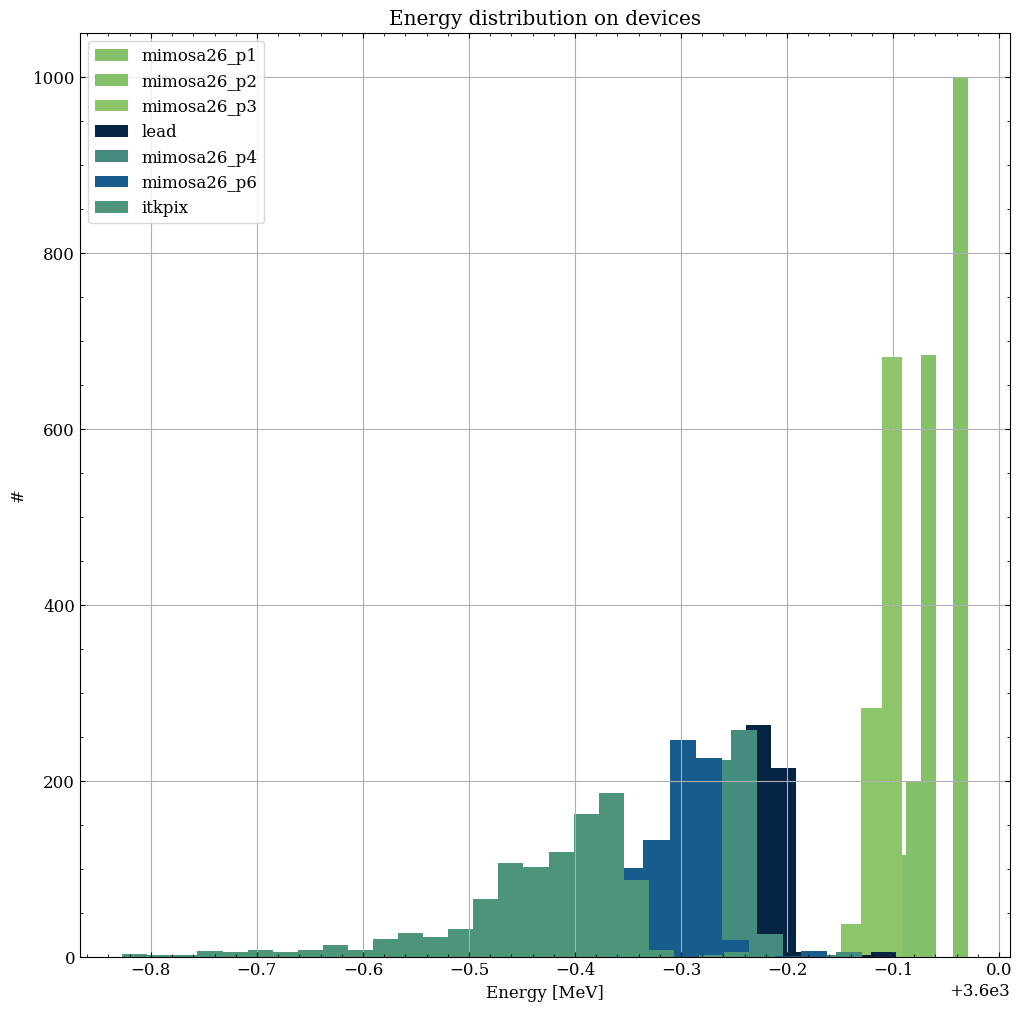

In [21]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
i = 0
for dut in range(len(devicess)):
    bin = int(np.std(hit_tables[0][i::len(devicess)][:10000])*300)
    ax.hist(hit_tables[0][i::len(devicess)][:100000], bins=bin ,color=cm.naviaS.resampled(len(devicess))(len(devicess)-i), label='%s' %names[i])
    i += 1
    
ax.set_xlabel('Energy [MeV]')
ax.set_ylabel('#')
ax.grid()
ax.set_title('Energy distribution on devices')
ax.legend()

2024-04-08 19:31:45,441 [pytestbeam        ] - INFO    Plotting x angle distribution of first 100000 events


1
1
1
1
1
1
1


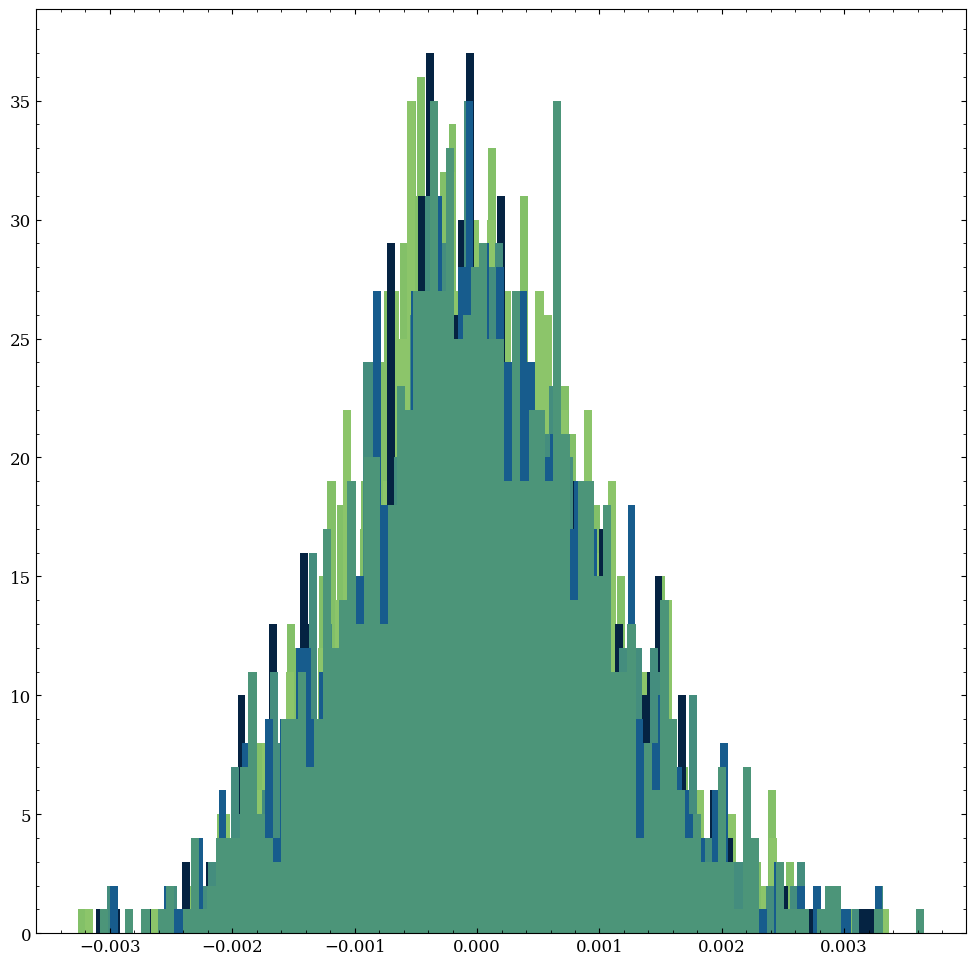

In [25]:
events = 100000
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
log.info('Plotting x angle distribution of first %s events' %events)
i = 0
numb_devices = len(names)
for dut in (range(numb_devices)):
    bin = int(np.std(hit_tables[1][i::(numb_devices)][:events])*300+1)
    print(bin)
    ax.hist(hit_tables[1][i::numb_devices][:events], bins=100 ,color=cm.naviaS.resampled(numb_devices)(numb_devices-i), label='%s' %names[i])
    i += 1

In [5]:
plot_events(devicess, names, hit_tables, np.arange(60, 65, 1))

TypeError: plot_events() missing 1 required positional argument: 'log'

In [ ]:
# fiel_dut_1 = '/home/rasmus/Documents/pieces of interest/output_pytestbeam/1_dut.h5'
# fiel_dut_2 = '/home/rasmus/Documents/pieces of interest/output_pytestbeam/2_dut.h5'

# correlate(fiel_dut_1, fiel_dut_2, dut_2, dut_3)